<a href="https://colab.research.google.com/github/mdsaifin/Load_forecast/blob/main/Load_forecasting_for_NIT_Patna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
# Project: Energy Load Forecasting for NIT Patna
# By MD SAIF
# Date of Starting: 6 feb 2023
# Date of Completion: 16 feb 2023
# Place: NIT Patna

## Importing Libraries

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [274]:
data = pd.read_csv('NITP_load_data.csv')

In [275]:
data

,Log Date / Time,NBCC FEEDER PILLER,LIBRARY BLDG,GIRLS HOSTEL,MAIN BLDG,CIVIL BLDG,FEEDER PILLER 4,FEEDER PILLER 2,SAC BLDG,FEEDER PILLER 5,MAIN POWER,TOTAL
0,01-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,1041.41,181.26,367.04,7.28,1596.99
1,02-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,985.79,194.38,355.01,8.31,1543.49
2,03-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,996.35,200.86,348.99,8.30,1554.50
3,04-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,920.51,171.73,344.93,6.64,1443.81
4,05-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,887.94,133.01,376.06,5.65,1402.66
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,882.75,61.39,345.09,4.88,1294.11
362,28-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,913.34,70.77,326.85,7.16,1318.12
363,29-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,929.22,80.80,391.17,6.60,1407.79
364,30-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,895.49,74.69,394.14,6.47,1370.79


In [276]:
data['TOTAL'].mean()

1667.3260928961747

In [277]:
df = data.iloc[:][['Log Date / Time','TOTAL']]
df

,Log Date / Time,TOTAL
0,01-01-2020 00:00,1596.99
1,02-01-2020 00:00,1543.49
2,03-01-2020 00:00,1554.50
3,04-01-2020 00:00,1443.81
4,05-01-2020 00:00,1402.66
...,...,...
361,27-12-2020 00:00,1294.11
362,28-12-2020 00:00,1318.12
363,29-12-2020 00:00,1407.79
364,30-12-2020 00:00,1370.79


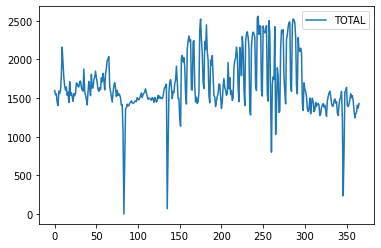

In [278]:
df.plot()

In [279]:
df = df[df['TOTAL'] > 1000]
df = df[df['TOTAL'] < 2000]
df.to_csv('filtered_data.csv', index=False)

In [280]:
df

,Log Date / Time,TOTAL
0,01-01-2020 00:00,1596.99
1,02-01-2020 00:00,1543.49
2,03-01-2020 00:00,1554.50
3,04-01-2020 00:00,1443.81
4,05-01-2020 00:00,1402.66
...,...,...
361,27-12-2020 00:00,1294.11
362,28-12-2020 00:00,1318.12
363,29-12-2020 00:00,1407.79
364,30-12-2020 00:00,1370.79


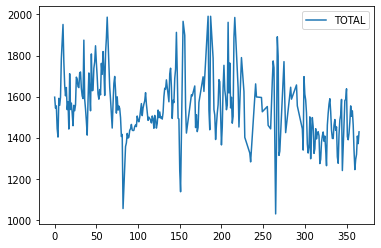

In [281]:
df.plot()

In [282]:
train = df[:int(len(df)*0.8)]
test = df[int(len(df)*0.8):]

# ARMA

In [283]:
array_data = np.array(df['TOTAL'])
print(array_data)

[1596.99 1543.49 1554.5  1443.81 1402.66 1591.45 1557.29 1596.69 1784.1
 1951.24 1770.16 1656.75 1603.73 1644.14 1536.45 1575.19 1441.82 1711.31
 1536.72 1568.23 1520.52 1457.91 1557.59 1530.99 1559.82 1694.64 1685.27
 1648.17 1643.73 1715.69 1719.68 1639.89 1603.35 1590.14 1874.87 1586.6
 1539.53 1481.5  1412.26 1579.14 1715.   1629.03 1530.81 1807.69 1628.56
 1630.61 1737.62 1768.91 1847.45 1765.75 1695.67 1612.76 1587.29 1634.34
 1608.22 1761.79 1708.87 1819.12 1733.42 1605.52 1811.78 1882.43 1986.89
 1645.92 1585.95 1512.24 1446.66 1565.17 1663.08 1698.05 1630.54 1519.33
 1598.81 1533.95 1553.64 1542.08 1496.74 1405.53 1415.66 1054.53 1356.65
 1374.49 1420.54 1398.04 1402.35 1435.9  1443.09 1464.33 1436.83 1434.17
 1435.49 1454.14 1461.8  1453.74 1505.13 1483.37 1477.15 1498.9  1533.44
 1565.79 1507.14 1543.91 1563.31 1579.21 1619.06 1564.11 1524.02 1484.1
 1499.48 1493.35 1486.32 1471.59 1505.27 1490.66 1445.67 1508.17 1487.53
 1446.3  1469.24 1534.25 1497.21 1525.3  1495.42 1500.

In [284]:
xtrain = array_data[:len(array_data)-8]
xtest = array_data[len(array_data)-8:]

In [285]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['TOTAL'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-value : ",dftest[1])
print("3. No. of lags : ",dftest[2])
print("4. No. of observation used for ADF regression and critical value calculation : ",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
  print("\t",key,":",val)

1. ADF :  -2.0362377371917364
2. P-value :  0.27091353345993396
3. No. of lags :  15
4. No. of observation used for ADF regression and critical value calculation :  272
5. Critical Values : 
	 1% : -3.4546223782586534
	 5% : -2.8722253212300277
	 10% : -2.5724638500216264


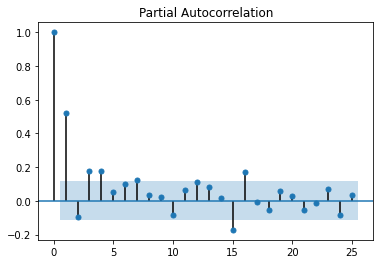

In [286]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf = plot_pacf(df['TOTAL'],lags = 25)

In [287]:
Amodel = AutoReg(xtrain,lags = 8).fit()


In [288]:
print(Amodel.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  280
Model:                     AutoReg(8)   Log Likelihood               -1709.821
Method:               Conditional MLE   S.D. of innovations            129.953
Date:                Wed, 15 Feb 2023   AIC                              9.808
Time:                        17:00:12   BIC                              9.940
Sample:                             8   HQIC                             9.861
                                  280                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    411.5021    126.187      3.261      0.001     164.181     658.824
y.L1           0.5104      0.061      8.425      0.000       0.392       0.629
y.L2          -0.1835      0.068     -2.711      0.0

In [289]:
pred_arma = Amodel.predict(start = len(xtrain), end =len(array_data)-1, dynamic = False)

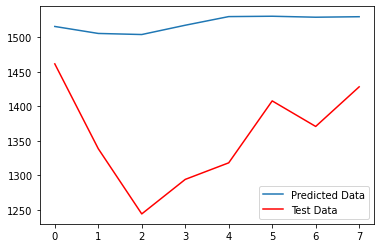

In [290]:
plt.plot(pred_arma, label="Predicted Data")
plt.plot(xtest,color = 'red', label="Test Data")
plt.legend(loc="best")
plt.show()

In [291]:
rmse_arma = sqrt(mean_squared_error(xtest,pred_arma))
rmse_arma

174.3937435376214

In [292]:
error_percent_arma = 100 * rmse_arma/ np.mean(test["TOTAL"])
error_percent_arma

12.244130621474433

## ARIMA

In [293]:
model_arima = ARIMA(train["TOTAL"], order=(2,1,2))
model_arima = model_arima.fit()
predictions_arima = model_arima.predict(start=len(train), end=len(train)+len(test)-1, typ="levels")

In [294]:
predictions_arima

230    1478.496051
231    1521.548979
232    1507.078068
233    1492.610563
234    1491.276699
235    1494.152026
236    1495.378226
237    1495.114852
238    1494.750490
239    1494.693821
240    1494.758840
241    1494.792618
242    1494.788602
243    1494.779604
244    1494.777636
245    1494.779060
246    1494.779965
247    1494.779930
248    1494.779712
249    1494.779651
250    1494.779680
251    1494.779704
252    1494.779705
253    1494.779700
254    1494.779698
255    1494.779699
256    1494.779699
257    1494.779699
258    1494.779699
259    1494.779699
260    1494.779699
261    1494.779699
262    1494.779699
263    1494.779699
264    1494.779699
265    1494.779699
266    1494.779699
267    1494.779699
268    1494.779699
269    1494.779699
270    1494.779699
271    1494.779699
272    1494.779699
273    1494.779699
274    1494.779699
275    1494.779699
276    1494.779699
277    1494.779699
278    1494.779699
279    1494.779699
280    1494.779699
281    1494.779699
282    1494.

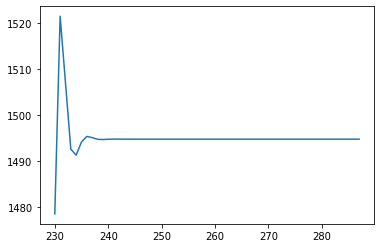

In [295]:
predictions_arima.plot()

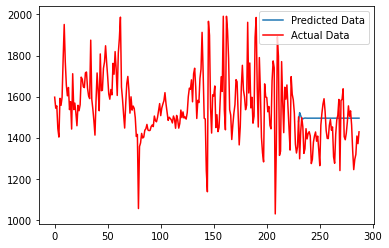

In [296]:
plt.plot(predictions_arima, label="Predicted Data")
plt.plot(array_data,color = 'red', label="Actual Data")
plt.legend(loc="best")
plt.show()

In [297]:
mse_arima = mean_squared_error(test["TOTAL"], predictions_arima)
rmse_arima = np.sqrt(mse_arima)
rmse_arima

118.57463833469494

In [298]:
error_percent_arima = 100 * rmse_arima / np.mean(test["TOTAL"])
error_percent_arima

8.325088565180627

## SARIMA

In [299]:
model_sarima = SARIMAX(train["TOTAL"], order=(2, 1, 2), seasonal_order=(0, 1, 1, 7))
model_sarima_fit = model_sarima.fit()
sarima_prediction = model_sarima_fit.forecast(steps=len(test))

In [300]:
sarima_prediction

230    1489.113710
231    1520.105578
232    1512.337146
233    1483.740737
234    1458.064515
235    1480.594576
236    1481.150624
237    1496.884040
238    1488.880167
239    1497.426422
240    1483.758851
241    1458.985348
242    1478.149168
243    1477.377580
244    1493.500662
245    1485.950575
246    1494.550338
247    1480.789011
248    1455.971571
249    1475.143957
250    1474.385964
251    1490.511411
252    1482.958766
253    1491.557108
254    1477.795942
255    1452.978903
256    1472.151382
257    1471.393321
258    1487.518723
259    1479.966080
260    1488.564434
261    1474.803271
262    1449.986230
263    1469.158707
264    1468.400646
265    1484.526049
266    1476.973406
267    1485.571760
268    1471.810597
269    1446.993556
270    1466.166033
271    1465.407972
272    1481.533375
273    1473.980732
274    1482.579086
275    1468.817922
276    1444.000882
277    1463.173359
278    1462.415298
279    1478.540701
280    1470.988057
281    1479.586411
282    1465.

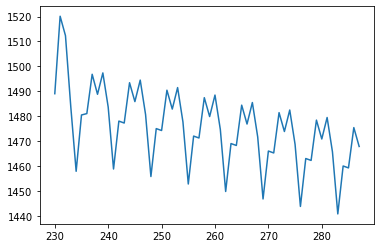

In [301]:
sarima_prediction.plot()

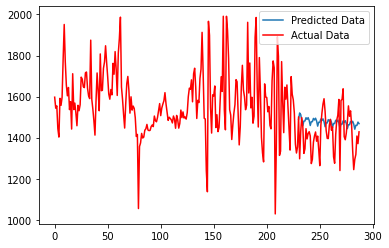

In [302]:
plt.plot(sarima_prediction, label="Predicted Data")
plt.plot(array_data,color = 'red', label="Actual Data")
plt.legend(loc="best")
plt.show()

In [303]:
sarima_rmse = sqrt(mean_squared_error(test["TOTAL"], sarima_prediction))
sarima_rmse


107.73423409824049

In [304]:
error_percent_sarima = 100 * sarima_rmse / np.mean(test["TOTAL"])
error_percent_sarima

7.5639871473875075